### Importing the necessary Libraries

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

### Importing the data

In [114]:
data = pd.read_csv('C:/Users/ritaf/Documents/GitHub/CP/Capstone/No_show_prediction/medical-appointments-no-show-en.csv')

## Exploratory Data Analysis

Taking an initial look at our dataframe

In [115]:
data.head()
# We have 49593 rows

,specialty,appointment_time,gender,appointment_date,no_show,no_show_reason,disability,date_of_birth,entry_service_date,city,...,over_60_years_old,patient_needs_companion,average_temp_day,average_rain_day,max_temp_day,max_rain_day,rainy_day_before,storm_day_before,rain_intensity,heat_intensity
0,physiotherapy,13:20,M,09/09/2021,yes,surto,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
1,psychotherapy,13:20,M,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
2,speech therapy,13:20,F,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
3,physiotherapy,13:20,F,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
4,physiotherapy,14:00,M,09/09/2021,no,NaN,motor,10/10/1954,5/2/2020,B. CAMBORIU,...,1,1,20.75,0.01,23.7,0.2,1,1,no_rain,mild


In [116]:
data.info()
# Temos bastantes nans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49593 entries, 0 to 49592
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   specialty                42139 non-null  object 
 1   appointment_time         49593 non-null  object 
 2   gender                   49593 non-null  object 
 3   appointment_date         49593 non-null  object 
 4   no_show                  49593 non-null  object 
 5   no_show_reason           1737 non-null   object 
 6   disability               44456 non-null  object 
 7   date_of_birth            39272 non-null  object 
 8   entry_service_date       44438 non-null  object 
 9   city                     44412 non-null  object 
 10  icd                      10717 non-null  object 
 11  appointment_month        49593 non-null  object 
 12  appointment_year         49593 non-null  int64  
 13  appointment_shift        49593 non-null  object 
 14  age                   

From the previous output we can see that:
- Some columns can be delete, like the date_of_birth as we already have age, and appointment_shift as we already have the appointment time
- There are some columns (__no_show_reason__  and __idc__) with a high number of invalid values which we will proceed to drop.
- Some columns must be converted to other data types 

#### Dropping troublesome columns

In [117]:
data.drop(['no_show_reason', 'icd', 'date_of_birth', 'appointment_shift'], axis = 1, inplace = True)
# ICD é o código da doença

#### Missing values

Dropping the remaining null values from the remaining columns

In [118]:
data.dropna(inplace = True)
# ficamos com 34607 rows (dropamos 14986)

In [119]:
data

,specialty,appointment_time,gender,appointment_date,no_show,disability,entry_service_date,city,appointment_month,appointment_year,...,over_60_years_old,patient_needs_companion,average_temp_day,average_rain_day,max_temp_day,max_rain_day,rainy_day_before,storm_day_before,rain_intensity,heat_intensity
4,physiotherapy,14:00,M,09/09/2021,no,motor,5/2/2020,B. CAMBORIU,sept,2021,...,1,1,20.75,0.01,23.7,0.2,1,1,no_rain,mild
5,occupational therapy,14:00,M,09/09/2021,no,intellectual,26/11/2019,ITAJAÍ,sept,2021,...,0,1,20.75,0.01,23.7,0.2,1,1,no_rain,mild
6,psychotherapy,14:00,M,09/09/2021,no,intellectual,1/10/2019,CAMBORIU,sept,2021,...,0,1,20.75,0.01,23.7,0.2,1,1,no_rain,mild
8,occupational therapy,14:00,M,09/09/2021,no,intellectual,20/11/2019,ITAJAÍ,sept,2021,...,0,1,20.75,0.01,23.7,0.2,1,1,no_rain,mild
11,physiotherapy,14:40,F,09/09/2021,no,motor,23/6/2020,NAVEGANTES,sept,2021,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49552,occupational therapy,17:00,M,01/03/2021,no,motor,28/9/2020,ITAJAÍ,mar,2021,...,0,0,22.55,4.22,24.6,32.8,1,1,heavy,mild
49554,speech therapy,17:00,F,01/03/2021,no,motor,14/8/2019,ITAJAÍ,mar,2021,...,1,1,22.55,4.22,24.6,32.8,1,1,heavy,mild
49556,physiotherapy,17:40,F,01/03/2021,no,motor,14/8/2019,ITAJAÍ,mar,2021,...,1,1,22.55,4.22,24.6,32.8,1,1,heavy,mild
49557,occupational therapy,17:40,F,01/03/2021,no,intellectual,19/8/2019,BALN. PIÇARRAS,mar,2021,...,0,1,22.55,4.22,24.6,32.8,1,1,heavy,mild


In [91]:
# # Specify the columns to be one-hot encoded
# columns_to_encode = ['specialty', 'gender', 'disability']

# # Create a ColumnTransformer with OneHotEncoder for specified columns
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('onehot', OneHotEncoder(), columns_to_encode)
#     ],
#     remainder='passthrough'  # Passthrough other columns not specified for encoding
# )

# # Fit and transform the data
# df_encoded = preprocessor.fit_transform(data)

# # Convert the result back to a DataFrame (optional)
# df_encoded = pd.DataFrame(df_encoded, columns=list(preprocessor.get_feature_names_out()))

# # Concatenate the original DataFrame and the encoded DataFrame
# data = pd.concat([data.reset_index(drop=True), df_encoded], axis=1)

In [120]:
# Specify the columns to be one-hot encoded
columns_to_encode = ['specialty', 'gender', 'disability']

# Create a OneHotEncoder
encoder = OneHotEncoder(sparse=False, dtype=int)

# Fit and transform the specified columns
df_encoded = encoder.fit_transform(data[columns_to_encode])

# Convert the result back to a DataFrame
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(columns_to_encode))

# Reset the index of the original DataFrame
data = data.reset_index(drop=True)

# Concatenate the original DataFrame and the encoded DataFrame
data = pd.concat([data, df_encoded], axis=1)

# Drop the original columns that were one-hot encoded
data = data.drop(columns=columns_to_encode, axis=1)



In [122]:
data['no_show'] = data['no_show'].map({'yes': 1, 'no': 0})
data

,appointment_time,appointment_date,no_show,entry_service_date,city,appointment_month,appointment_year,age,under_12_years_old,over_60_years_old,...,specialty_pedagogo,specialty_physiotherapy,specialty_psychotherapy,specialty_sem especialidade,specialty_speech therapy,gender_F,gender_I,gender_M,disability_intellectual,disability_motor
0,14:00,09/09/2021,0,5/2/2020,B. CAMBORIU,sept,2021,68.0,0,1,...,0,1,0,0,0,0,0,1,0,1
1,14:00,09/09/2021,0,26/11/2019,ITAJAÍ,sept,2021,5.0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,14:00,09/09/2021,0,1/10/2019,CAMBORIU,sept,2021,11.0,1,0,...,0,0,1,0,0,0,0,1,1,0
3,14:00,09/09/2021,0,20/11/2019,ITAJAÍ,sept,2021,5.0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,14:40,09/09/2021,0,23/6/2020,NAVEGANTES,sept,2021,28.0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34602,17:00,01/03/2021,0,28/9/2020,ITAJAÍ,mar,2021,23.0,0,0,...,0,0,0,0,0,0,0,1,0,1
34603,17:00,01/03/2021,0,14/8/2019,ITAJAÍ,mar,2021,68.0,0,1,...,0,0,0,0,1,1,0,0,0,1
34604,17:40,01/03/2021,0,14/8/2019,ITAJAÍ,mar,2021,68.0,0,1,...,0,1,0,0,0,1,0,0,0,1
34605,17:40,01/03/2021,0,19/8/2019,BALN. PIÇARRAS,mar,2021,5.0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34607 entries, 0 to 34606
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   specialty                               34607 non-null  object 
 1   appointment_time                        34607 non-null  object 
 2   gender                                  34607 non-null  object 
 3   appointment_date                        34607 non-null  object 
 4   no_show                                 34607 non-null  object 
 5   disability                              34607 non-null  object 
 6   entry_service_date                      34607 non-null  object 
 7   city                                    34607 non-null  object 
 8   appointment_month                       34607 non-null  object 
 9   appointment_year                        34607 non-null  int64  
 10  age                                     34607 non-null  fl

Note that there are no longer missing values

In [10]:
for column in data.columns:
    print(column, data[column].unique())

specialty ['physiotherapy' 'occupational therapy' 'psychotherapy' 'speech therapy'
 'enf' 'assist' 'pedagogo' 'sem especialidade']
appointment_time ['14:00' '14:40' '15:20' '16:20' '17:00' '17:40' '13:20' '07:20' '08:00'
 '08:40' '10:20' '11:00' '11:40' '09:20' '13:30' '16:40' '16:00' '13:00'
 '15:00' '09:40' '07:00' '16:35' '13:50' '15:30' '18:15' '17:25' '14:50'
 '15:40' '17:20' '08:20' '09:10' '10:30' '11:20' '07:30' '18:00' '07:50'
 '09:30' '08:50' '10:50' '12:20' '14:20' '17:10' '16:30' '11:10' '12:00'
 '13:15' '15:50' '10:00' '09:45' '10:35' '13:40' '13:05' '09:50' '15:10'
 '12:10' '11:30' '13:10' '14:30' '15:15' '16:10' '10:10' '10:40' '08:10'
 '18:20' '16:36' '17:36' '17:35' '09:03' '08:30']
gender ['M' 'F' 'I']
appointment_date ['09/09/2021' '09/09/2019' '09/08/2021' '09/08/2019' '09/08/2018'
 '09/08/2017' '09/07/2021' '09/07/2019' '09/06/2021' '09/06/2017'
 '09/05/2019' '09/05/2018' '09/05/2017' '09/04/2021' '09/04/2019'
 '09/04/2018' '09/03/2018' '09/02/2018' '09/02/2017' '0

Checking the distribution of our target

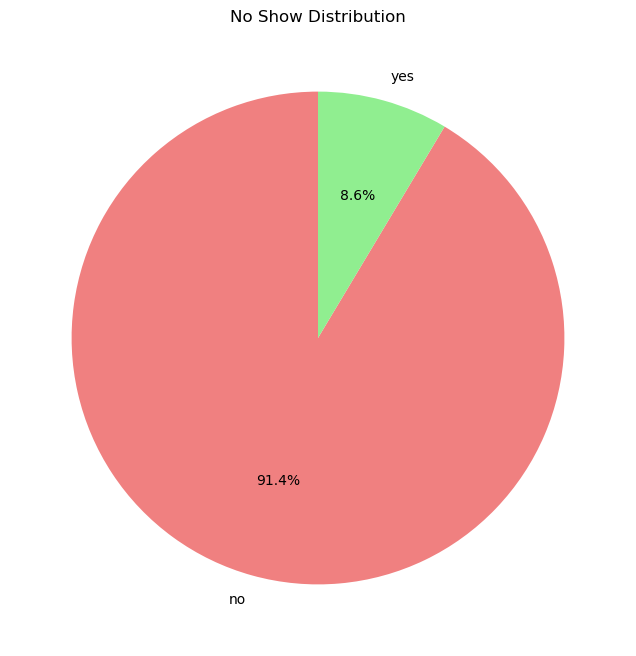

In [9]:
no_show_counts = data['no_show'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(no_show_counts, labels=no_show_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('No Show Distribution')
plt.show()


In [304]:
data.city.unique()

array(['B. CAMBORIU', 'ITAJAÍ', 'CAMBORIU', 'NAVEGANTES', 'ILHOTA',
       'BOMBINHAS', 'ITAPEMA', 'PORTO BELO', 'PENHA', 'LUIZ ALVES',
       'BALN. PIÇARRAS'], dtype=object)

In [305]:
distances = {'B. CAMBORIU': 12.3,
             'ITAJAÍ': 2.4,
             'CAMBORIU': 14.2,
             'NAVEGANTES': 6.3,
             'ILHOTA': 23,
             'BOMBINHAS': 49.1,
             'ITAPEMA': 27.1,
             'PORTO BELO': 39.3,
             'PENHA': 28,
             'LUIZ ALVES': 44,
             'BALN. PIÇARRAS': 26.3
          }

In [306]:
data['distances (km)'] = data['city'].map(distances)

In [307]:
# transforma horas em floats
data['appointment_time'] = data['appointment_time'].apply(lambda x: round(int(x.split(':')[0]) + int(x.split(':')[1]) / 60, 1))


In [308]:
data['entry_service_date'] = pd.to_datetime(data['entry_service_date'], format='%d/%m/%Y', errors='coerce')
data = data.dropna(subset=['entry_service_date'])

In [309]:
#df1['entry_service_date'] = pd.to_datetime(df1['entry_service_date'], format='%d/%m/%Y')
data['recency'] = pd.to_datetime('now') - pd.to_datetime(data['entry_service_date'])
data['recency'] = data['recency'].dt.days

In [310]:
#check if recency is correct
#data['recency'].unique()

In [311]:
data.isna().any()
# now we don't have any nans

specialty                  False
appointment_time           False
gender                     False
appointment_date           False
no_show                    False
disability                 False
entry_service_date         False
city                       False
appointment_month          False
appointment_year           False
age                        False
under_12_years_old         False
over_60_years_old          False
patient_needs_companion    False
average_temp_day           False
average_rain_day           False
max_temp_day               False
max_rain_day               False
rainy_day_before           False
storm_day_before           False
rain_intensity             False
heat_intensity             False
distances (km)             False
recency                    False
dtype: bool

In [312]:
data.drop('entry_service_date', axis = 1, inplace = True)
# now we can drop the entry_service_date column as we have the recency column

In [313]:
data.T

,4,5,6,8,11,12,13,14,16,18,...,49546,49547,49549,49550,49551,49552,49554,49556,49557,49558
specialty,physiotherapy,occupational therapy,psychotherapy,occupational therapy,physiotherapy,occupational therapy,psychotherapy,psychotherapy,speech therapy,physiotherapy,...,speech therapy,speech therapy,occupational therapy,psychotherapy,psychotherapy,occupational therapy,speech therapy,physiotherapy,occupational therapy,psychotherapy
appointment_time,14.0,14.0,14.0,14.0,14.7,14.7,14.7,14.7,14.7,15.3,...,16.3,16.3,17.0,17.0,17.0,17.0,17.0,17.7,17.7,17.7
gender,M,M,M,M,F,M,M,F,M,M,...,F,F,F,F,F,M,F,F,F,M
appointment_date,09/09/2021,09/09/2021,09/09/2021,09/09/2021,09/09/2021,09/09/2021,09/09/2021,09/09/2021,09/09/2021,09/09/2021,...,01/03/2021,01/03/2021,01/03/2021,01/03/2021,01/03/2021,01/03/2021,01/03/2021,01/03/2021,01/03/2021,01/03/2021
no_show,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
disability,motor,intellectual,intellectual,intellectual,motor,motor,intellectual,intellectual,intellectual,motor,...,intellectual,intellectual,intellectual,intellectual,intellectual,motor,motor,motor,intellectual,motor
city,B. CAMBORIU,ITAJAÍ,CAMBORIU,ITAJAÍ,NAVEGANTES,B. CAMBORIU,ITAJAÍ,ILHOTA,ITAJAÍ,BOMBINHAS,...,BALN. PIÇARRAS,ITAPEMA,ITAPEMA,ITAPEMA,BALN. PIÇARRAS,ITAJAÍ,ITAJAÍ,ITAJAÍ,BALN. PIÇARRAS,ITAJAÍ
appointment_month,sept,sept,sept,sept,sept,sept,sept,sept,sept,sept,...,mar,mar,mar,mar,mar,mar,mar,mar,mar,mar
appointment_year,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,...,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
age,68.0,5.0,11.0,5.0,28.0,68.0,5.0,9.0,5.0,25.0,...,5.0,9.0,9.0,9.0,5.0,23.0,68.0,68.0,5.0,23.0


In [314]:
# creating the day of appointment column, since we already have the month and year columns
data['appointment_day'] = pd.to_datetime(data['appointment_date'], format='%d/%m/%Y').dt.day

In [315]:
# we can now drop the appointment_date column
data.drop('appointment_date', axis=1, inplace = True)

In [316]:
data.appointment_month.unique()

array(['sept', 'aug', 'july', 'june', 'may', 'april', 'mar', 'feb', 'dec',
       'nov', 'oct', 'jan'], dtype=object)

In [317]:
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3,
                 'april': 4, 'may': 5, 'june': 6, 'july': 7, 'aug': 8,
                 'sept': 9, 'oct': 10, 'nov': 11, 'dec': 12}

In [318]:
data['appointment_month'] = data['appointment_month'].map(month_mapping)


In [320]:
temperature_mapping = {'heavy_cold': -2, 'cold': -1, 'mild': 0, 'warm': 1, 'heavy_warm': 2}
data['heat_intensity'] = data['heat_intensity'].map(temperature_mapping)

In [322]:
rainfall_mapping = {'no_rain': 0, 'weak': 1, 'moderate': 2, 'heavy': 3}
data['rain_intensity'] = data['rain_intensity'].map(rainfall_mapping)

In [321]:
gender_mapping = {'M': 0, 'F': 1}
data['gender'] = data['gender'].map(gender_mapping)

In [325]:
noshow_mapping = {'yes': 0, 'no': 1}
data['showed_up'] = data['no_show'].map(noshow_mapping)
data.drop('no_show', axis = 1, inplace = True)
# mudar de no show para showed up para ser mais intuitivo